In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [ ]:
data_dir
# pathlib to work with files
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir



PosixPath('datasets/flower_photos')

In [ ]:
# show 5 imagepaths 
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/5492988531_574cdc2bf0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4910094611_8c7170fc95_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15697872479_ed48e9dd73_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('datasets/flower_photos/roses/9614492283_66020fb4eb_n.jpg')]

In [ ]:
# count no of images 
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)


3670


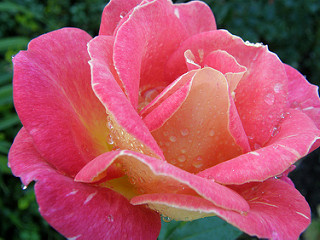

In [ ]:
# count no of roses 
roses = list(data_dir.glob('roses/*'))
roses[:5]

# show rose image 
PIL.Image.open(str(roses[1]))



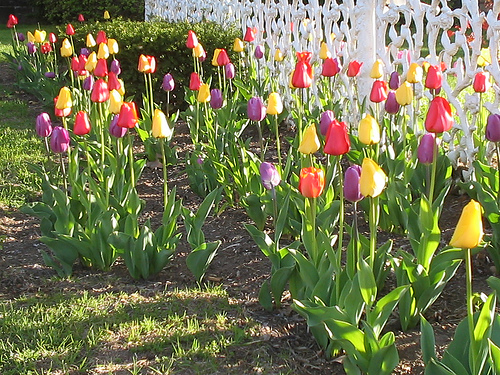

In [ ]:
# count no of tulips 
tulips = list(data_dir.glob('tulips/*'))
# show tulip
PIL.Image.open(str(tulips[0]))

In [ ]:
# create a image dictionary item with all the flower folders 

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}


In [ ]:
# labels dictionary 
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]



[PosixPath('datasets/flower_photos/roses/5492988531_574cdc2bf0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4910094611_8c7170fc95_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15697872479_ed48e9dd73_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9337528427_3d09b7012b.jpg'),
 PosixPath('datasets/flower_photos/roses/9614492283_66020fb4eb_n.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])


'datasets/flower_photos/roses/5492988531_574cdc2bf0_n.jpg'

In [ ]:
# read image 
img = cv2.imread(str(flowers_images_dict['roses'][0]))

img.shape



(240, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

# create X as resized image array and y as label array
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [ ]:
X = np.array(X)
y = np.array(y)


In [ ]:
from sklearn.model_selection import train_test_split

# train test spilt 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# scale x train and test to get  value ranged from 0 to 1
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


In [ ]:
num_classes = 5

# create model
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# add optimizer , loss function , accuracy matrix
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# train model
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 82s 939ms/step - loss: 1.2752 - accuracy: 0.4662
Epoch 2/30
86/86 [==============================] - 71s 828ms/step - loss: 0.9689 - accuracy: 0.6199
Epoch 3/30
86/86 [==============================] - 71s 820ms/step - loss: 0.7301 - accuracy: 0.7242
Epoch 4/30
86/86 [==============================] - 71s 827ms/step - loss: 0.5341 - accuracy: 0.8023
Epoch 5/30
86/86 [==============================] - 71s 825ms/step - loss: 0.3223 - accuracy: 0.8961
Epoch 6/30
86/86 [==============================] - 71s 826ms/step - loss: 0.1839 - accuracy: 0.9411
Epoch 7/30
86/86 [==============================] - 71s 829ms/step - loss: 0.0998 - accuracy: 0.9727
Epoch 8/30
86/86 [==============================] - 71s 831ms/step - loss: 0.0424 - accuracy: 0.9891
Epoch 9/30
86/86 [==============================] - 71s 830ms/step - loss: 0.0243 - accuracy: 0.9956
Epoch 10/30
86/86 [==============================] - 71s 829ms/step - loss: 0.0516 - accura

In [ ]:
# evaluate model

model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 252ms/step - loss: 2.8210 - accuracy: 0.6710


[2.821045160293579, 0.671023964881897]

In [ ]:
# predictions
predictions = model.predict(X_test_scaled)
predictions



array([[ -2.3780625 ,   7.426814  ,  11.394861  ,  -7.249094  ,
         -6.185131  ],
       [  6.109259  ,   0.7660477 ,   0.26997945,   0.1686595 ,
          5.275587  ],
       [  6.2350492 ,   0.5997128 ,  23.730843  , -23.630205  ,
         -5.7560306 ],
       ...,
       [ -1.998166  , -13.896985  ,   5.390161  ,  30.326485  ,
         -5.0292177 ],
       [ 17.104132  ,   0.6678624 ,   2.6942005 ,  -8.377492  ,
         -0.7271466 ],
       [ -0.27832878, -14.377154  ,  -2.494849  ,  20.310043  ,
          2.2173474 ]], dtype=float32)

In [ ]:
# apply softmax on predited data
score = tf.nn.softmax(predictions[0])

np.argmax(score)



2

In [ ]:
y_test[0]

1

In [ ]:
# use data augmentation to deal with image rotation 

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",  input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


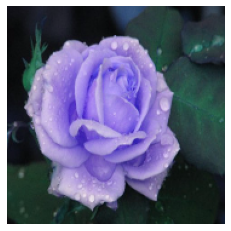

In [ ]:
plt.axis('off')
plt.imshow(X[0])


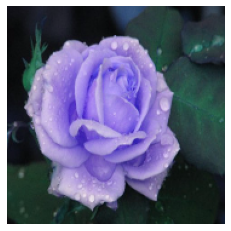

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))


In [ ]:
num_classes = 5

# create model with data augmentation as additional
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# add optimizer , loss function , accuracy matrix
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# train model using model.fit() method
model.fit(X_train_scaled, y_train, epochs=30)    


Epoch 1/30
86/86 [==============================] - 96s 1s/step - loss: 1.4745 - accuracy: 0.3786
Epoch 2/30
86/86 [==============================] - 95s 1s/step - loss: 1.1146 - accuracy: 0.5436
Epoch 3/30
86/86 [==============================] - 96s 1s/step - loss: 0.9951 - accuracy: 0.6017
Epoch 4/30
86/86 [==============================] - 96s 1s/step - loss: 0.9085 - accuracy: 0.6421
Epoch 5/30
86/86 [==============================] - 95s 1s/step - loss: 0.8522 - accuracy: 0.6581
Epoch 6/30
86/86 [==============================] - 95s 1s/step - loss: 0.7919 - accuracy: 0.6937
Epoch 7/30
86/86 [==============================] - 95s 1s/step - loss: 0.7535 - accuracy: 0.7155
Epoch 8/30
86/86 [==============================] - 95s 1s/step - loss: 0.7258 - accuracy: 0.7227
Epoch 9/30
86/86 [==============================] - 95s 1s/step - loss: 0.6933 - accuracy: 0.7293
Epoch 10/30
86/86 [==============================] - 94s 1s/step - loss: 0.6673 - accuracy: 0.7464
Epoch 11/30
86/86 [

In [ ]:
# evaluate model
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 8s 256ms/step - loss: 0.9994 - accuracy: 0.7092


[0.9994480013847351, 0.7091503143310547]